In [27]:
path='https://raw.githubusercontent.com/DeepConnectAI/challenge-week-4/master/data/obesity_data.csv'


In [108]:
import numpy as np
import pandas as pd
from mxnet import nd

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

ModuleNotFoundError: ignored

In [109]:
data=pd.read_csv(path)

In [110]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [111]:
gender_preprocessing={"Gender":{"Female":1,"Male":0}}
data.replace(gender_preprocessing, inplace=True)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,1,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,0,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,0,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,0,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [112]:
labelencoder=LabelEncoder()
for col in  ['family_history_with_overweight','FAVC','SMOKE','SCC','CAEC','CALC']:
  data[col]=labelencoder.fit_transform(data[col])
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,Public_Transportation,Normal_Weight
1,1,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,Public_Transportation,Normal_Weight
2,0,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,Public_Transportation,Normal_Weight
3,0,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,Walking,Overweight_Level_I
4,0,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,Public_Transportation,Overweight_Level_II


In [113]:
onehotencoder=OneHotEncoder()
for col in ['MTRANS','NObeyesdad']:
  data=pd.concat([data,pd.get_dummies(data[col],prefix=col)],axis=1)
  data.drop([col],axis=1, inplace=True)

In [114]:
data.insert(0,'w0',1)
data.head()

,w0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,1,1,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,0,0,0,1,0,0,1,0,0,0,0,0
1,1,1,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,0,0,0,1,0,0,1,0,0,0,0,0
2,1,0,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,0,0,0,1,0,0,1,0,0,0,0,0
3,1,0,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,0,0,0,1,0,0,0,0,0,0,0,1


In [115]:
minmax=MinMaxScaler()
preprocessed_data=minmax.fit_transform(data)

In [116]:
preprocessed_data.shape

(2111, 28)

In [117]:
X=preprocessed_data[:,:-7]
y=preprocessed_data[:,-7:]

In [118]:
X.shape

(2111, 21)

In [119]:
y.shape

(2111, 7)

In [120]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.33,random_state=33)

In [121]:
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")
assert (X_train.shape[0]==y_train.shape[0] and X_test.shape[0]==y_test.shape[0]), "Check your splitting carefully"

X_train: (1414, 21) , y_train: (1414, 7)
X_test: (697, 21) , y_test: (697, 7)


In [205]:
# DO NOT EDIT ANY VARIABLE OR FUNCTION NAME(S) IN THIS CELL
# Let's try more object oriented approach this time :)
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        '''Initialize variables
        Args:
            learning_rate  : Learning Rate
            max_iterations : Max iterations for training weights
        '''
        # Initialising all the parameters
        self.learning_rate  = learning_rate
        self.max_iterations = max_iterations
        self.losses    = []
        
        # Define epsilon because log(0) is not defined
        self.eps = 1e-7

    def softmax(self, z):
        '''Softmax function
        Args:
            z : A numpy array (num_samples,num_classes)
        Returns:
            A numpy array where softmax function applied to every sample
        '''
        assert len(z.shape) == 2
        
        ### START CODE HERE
        exp = np.exp(z-np.max(z, axis=1).reshape((-1,1)))
        norms = np.sum(exp, axis=1).reshape((-1,1))
        soft_z=exp / norms
        ### END CODE HERE
        
        return soft_z
    
    def cross_entropy_loss(self, y_true, y_pred):
        '''Compute cross_entropy_loss
        Args:
            y_true : Numpy array of actual truth values (num_samples,num_classes)
            y_pred : Numpy array of predicted values (num_samples,num_classes)
        Returns:
            Cross-entropy loss, scalar value (sum of cross entropy loss of individual classes)
        '''
        # Fix 0/1 values in y_pred so that log is not undefined
        y_pred = np.maximum(np.full(y_pred.shape, self.eps), np.minimum(np.full(y_pred.shape, 1-self.eps), y_pred))
        
        ### START CODE HERE
        # HINT: Take sum of losses of all classes
        ce_loss =  (-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)).mean()
        ### END CODE HERE
        
        return ce_loss
    
    def fit(self, X, y):
        '''Trains logistic regression model using gradient ascent
        to gain maximum likelihood on the training data
        Args:
            X : Numpy array (num_examples, num_features)
            y : Numpy array (num_examples, num_classes)
        Returns: VOID
        '''
        
        num_examples = X.shape[0]
        num_features = X.shape[1]
        num_classes  = y.shape[1]
        
        ### START CODE HERE
        
        # Initialize weights with appropriate shape [num_features, num_classes]
        self.weights = np.zeros((num_features,num_classes))
        
        # Perform gradient ascent
        for i in range(self.max_iterations):
            # Define the linear hypothesis(z) first
            z = np.dot(X,self.weights)
            
            # Output probability values using softmax
            y_pred = self.softmax(z)
            print(z)
          
            
            # Compute gradient for weights assiciated with each class 
            gradient = np.dot(X.T, (y_pred -  y))
            
            # Update the weights
            # Perform weight updation for each class
            self.weights = self.weights - self.learning_rate * gradient
            
            # Calculate loss
            loss = self.cross_entropy_loss(y, y_pred)

            self.losses.append(loss)
    
        ### END CODE HERE
    
    def predict_proba(self, X):
        '''Predict probabilities for given X.
        Remember sigmoid returns value between 0 and 1.
        Args:
            X : Numpy array (num_samples, num_features)
        Returns:
            probabilities: Numpy array (num_samples,num_classes)
        '''
        if self.weights is None:
            raise Exception("Fit the model before prediction")
        
        ### START CODE HERE
        z = np.dot(X, self.weights)
        probabilities = self.softmax(z)
      
        
        ### END CODE HERE
        
        return probabilities
    
    def predict(self, X):
        '''Predict/Classify X in classes
        Args:
            X         : Numpy array (num_samples, num_features)
        Returns:
            binary_predictions : Numpy array (num_samples, num_classes)
        '''
        
        ### START CODE HERE
        # HINT: Choose maximum probability (Set value to 1 and rest 0) to predict binary values using np.argmax() function
        b=self.predict_proba(X)
        b[np.where(b==np.argmax(b))] = 1
        b[np.where(b!=1)]=0
        binary_predictions = b
        
        ### END CODE HERE
        
        return binary_predictions

In [206]:
model=MyLogisticRegression()

In [207]:
model.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
 ...
 [  3.11734801   7.11206371   2.28119062 ... -16.59413044   2.16441876
   -0.48907871]
 [ 11.78925849  11.03428561  -3.36234572 ...  -2.27273784   1.6910215
   -3.30510514]
 [-15.96532243  -2.30782628  12.63137001 ...   3.43411391   2.85102699
  -12.80887011]]
[[ 5.46808174e+00  9.58361031e+00 -1.20982779e+01 ... -1.48774180e+00
   1.17026168e+01 -1.84889371e+00]
 [ 5.68119565e+00  8.92215588e+00 -1.15614648e+01 ... -5.63047245e+00
   1.46481216e+01 -4.36634935e-01]
 [ 6.58381613e-03  6.63806738e+00 -1.64246418e+01 ...  2.67825557e+00
   9.78082194e+00 -1.25038698e+00]
 ...
 [ 2.90839458e+00  7.57906225e+00 -1.71859610e+01 ... -1.10130563e+01
   5.94163720e+00  7.14370560e+00]
 [ 1.15878914e+01  1.14225920e+01 -1.83567634e+01 ...  2.73910804e+00
   4.64663876e+00  2.19676284e+00]
 [-1.63139840e+01 -1.52477608e+00 -1.57506434e+01 ...  1.16899393e+01
   8.47015680e+00 -2.09537933e+00]]
[[ 7.84351073e+00  1.06621904e+01 -2.77048913e+

In [208]:
model.predict(X_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [209]:
y_train_pred = model.predict(X_train)

In [210]:
train_loss = model.cross_entropy_loss(y_train, model.predict_proba(X_train))
print("Loss on training data:", train_loss)

Loss on training data: 0.5710039773882642


In [211]:
y_train_pred[:5]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [212]:
test_loss = model.cross_entropy_loss(y_test, model.predict_proba(X_test))
print("Loss on testing data:", test_loss)

Loss on testing data: 0.5822043203929673


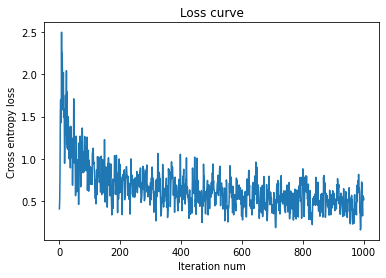

In [213]:
import matplotlib.pyplot as plt

plt.plot([i+1 for i in range(len(model.losses))], model.losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Cross entropy loss")
plt.show()

In [189]:
def accuracy(y_true,y_pred):
    '''Compute accuracy.
    Accuracy = (Correct prediction / number of samples)
    Args:
        y_true : Truth binary values (num_examples, )
        y_pred : Predicted binary values (num_examples, )
    Returns:
        accuracy: scalar value
    '''
    
    ### START CODE HERE
    
    accuracy = sum([1 for i in range(len(y_true)) if y_true[i]==y_pred[i]])/len(y_true) * 100
    ### END CODE HERE
    return accuracy

In [190]:
accuracy(y_train,y_train_pred)

ValueError: ignored